In [2]:
#Install and import all the required softwares for this homeowork
!pip install pdfplumber
!pip install vaderSentiment
!pip install pycountry

import requests
import nltk
import pycountry
import pdfplumber
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from urllib.parse import urljoin
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize, sent_tokenize, bigrams, trigrams, sentiment
from nltk.sentiment import SentimentIntensityAnalyzer

  Obtaining dependency information for pycountry from https://files.pythonhosted.org/packages/48/12/fdbcd29b5a243af2f1c1a83636a21e3837aeaa070c9212ebe657e39ce563/pycountry-23.12.11-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 12.2 MB/s eta 0:00:0000:0100:01


1. In class we wrote code to get all of the links from the G77 statements website: https://www.g77.org/statement/index.php
Please write code that iterates through each of the links and formats them properly so that they are a readable url. Print them to the console.

In [3]:
# Define the URL to be scraped
url = "https://www.g77.org/statement/"

# Send an HTTP GET request to the URL and store the response
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the anchor tags (<a>) in the HTML content
links = soup.find_all("a")

# Initialize an empty list to store the extracted links
list_links = []

# Loop through each anchor tag and extract the "href" attribute
for link in links:
    href = link.get("href")    
    # Check if the "href" attribute contains the specified substring
    if "getstatement.php?id" in href:
        # Combine the base URL and the relative URL to get the full URL
        full_url = urljoin(url, href)
        # Append the full URL to the list of links
        list_links.append(full_url)

# Print the final list of extracted links
print(list_links)

['https://www.g77.org/statement/getstatement.php?id=240219', 'https://www.g77.org/statement/getstatement.php?id=240215', 'https://www.g77.org/statement/getstatement.php?id=240212', 'https://www.g77.org/statement/getstatement.php?id=240208', 'https://www.g77.org/statement/getstatement.php?id=240207b', 'https://www.g77.org/statement/getstatement.php?id=240207', 'https://www.g77.org/statement/getstatement.php?id=240206b', 'https://www.g77.org/statement/getstatement.php?id=240206', 'https://www.g77.org/statement/getstatement.php?id=240205c', 'https://www.g77.org/statement/getstatement.php?id=240205b', 'https://www.g77.org/statement/getstatement.php?id=240205', 'https://www.g77.org/statement/getstatement.php?id=240202', 'https://www.g77.org/statement/getstatement.php?id=240122', 'https://www.g77.org/statement/getstatement.php?id=240121b', 'https://www.g77.org/statement/getstatement.php?id=240121', 'https://www.g77.org/statement/getstatement.php?id=240116']


2. Now modify your code so that the urls are saved as a list. Iterate through the list, open each url, and extract the text from each, and save the text to a file called G77_2024.

In [34]:
# Initialize an empty list to store the text content of statements
statement_texts = []

# Iterate through each URL in the provided list of links
for statement_url in list_links:
    # Send a GET request to the URL to retrieve the HTML content of the statement page
    statement_response = requests.get(statement_url)

    # Check if the request was successful (status code 200)
    if statement_response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        statement_soup = BeautifulSoup(statement_response.content, 'html.parser')

        # Find all paragraphs in the HTML content
        paragraphs = statement_soup.find_all("p")

        # Extract text from each paragraph and join them with two newlines as separators
        statement_text = '\n\n'.join([paragraph.text for paragraph in paragraphs])

        # Append the extracted text to the list of statement texts
        statement_texts.append(statement_text)
    else:
        # Print an error message if the request fails, specifying the URL that failed
        print(f"Failed to retrieve statement from {statement_url}")

# Open a text file named "G77_2024.txt" in write mode with UTF-8 encoding
with open("G77_2024.txt", "w", encoding="utf-8") as file:
    # Write the joined statement texts to the file, separated by "---"
    file.write("\n\n---\n\n".join(statement_texts))


3. Perform a word frequency distribution on the text and visualize the top 20 words used in these statements.( Please remove any stopwords first)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rakkshetsinghaal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('countries', 15), ('development', 11), ('developing', 11), ('nations', 8), ('sustainable', 8), ('united', 7), ('international', 7), ('china', 6), ('general', 6), ('implementation', 6), ('group', 5), ('assembly', 5), ('2024', 5), ('g77', 5), ('important', 4), ('meetings', 4), ('also', 4), ('well', 4), ('sdgs', 4), ('sdg', 4)]


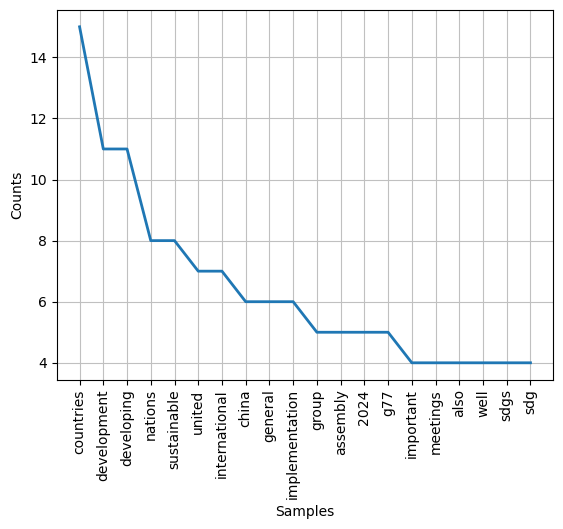

<Axes: xlabel='Samples', ylabel='Counts'>

In [39]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

# Download the NLTK stopwords corpus (if not already downloaded)
nltk.download('stopwords')

# Importing the necessary library for stopwords and tokenization
stopwords = set(nltk.corpus.stopwords.words("english"))

# Adding custom stopwords, including common punctuation marks
custom_stopwords = set(stopwords.union(set(string.punctuation)))

additional_stopwords = ["’", "—", "``","''","'s","n't","'re","'ve","–"]

# Append additional stopwords to the custom_stopwords set
custom_stopwords.update(additional_stopwords)
                        
# Tokenizing the input text
tokens = word_tokenize(statement_text)

# Initializing an empty list to store non-stopwords in lowercase
new_list = []

# Loop through each tokenized word, convert to lowercase, and filter out stopwords
for word in tokens:
    word = word.lower()
    if word not in custom_stopwords:
        new_list.append(word)

# Creating a frequency distribution object from the filtered list of words
fdis = FreqDist(new_list)

# Displaying the 20 most common words and their frequencies
print(fdis.most_common(20))

# Plotting the frequency distribution of the 20 most common words
fdis.plot(20)


4. Here is a link to a speech made by President Trump on January 6: https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial. Not all of the text is his speech. Some of the text is the analysis. Please extract Donald Trumps speech only, remove stopwords and perform a word frequency distribution and visualize it. 

[('people', 84), ('going', 74), ('want', 67), ('know', 59), ('get', 51), ('election', 46), ('country', 44), ('ballots', 43), ('got', 42), ('one', 41), ('votes', 41), ('go', 40), ('back', 40), ('said', 39), ('let', 38), ('state', 36), ('like', 34), ('right', 33), ('think', 33), ('way', 32)]


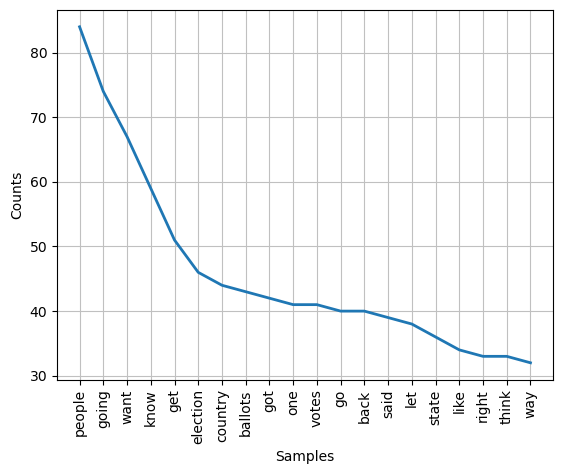

Axes(0.125,0.11;0.775x0.77)


In [37]:
# Set the URL to the target webpage containing Trump's Jan 6 speech
url = "https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial"

# Send a GET request to the URL and store the response
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content of the webpage
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize an empty string to store the extracted speech text
speech_text = ""

# Iterate through all 'p' (paragraph) elements on the webpage and concatenate their text
for paragraph in soup.find_all('p'):
    speech_text += paragraph.text + "\n"

# Tokenize the speech text into individual words
tokens = word_tokenize(speech_text)

# Create a list of lowercase words, excluding common English stopwords
filtered_words = [word.lower() for word in tokens if word.lower() not in custom_stopwords]

# Create a frequency distribution of the filtered words
fdis = FreqDist(filtered_words)

# Print the 20 most common words along with their frequencies
print(fdis.most_common(20))

# Plot a bar chart of the frequency distribution for the top 20 words
print(fdis.plot(20, cumulative=False))

5. Here is a link to a github repo that contains Donald Trump's speeches: https://github.com/ryanmcdermott/trump-speeches/blob/master/speeches.txt

What are the 10 most common things Donald Trump "loves?"



[('going', 2055), ('people', 1336), ('know', 1315), ('said', 773), ('want', 760), ('great', 687), ('get', 633), ('like', 627), ('think', 625), ('one', 592)]


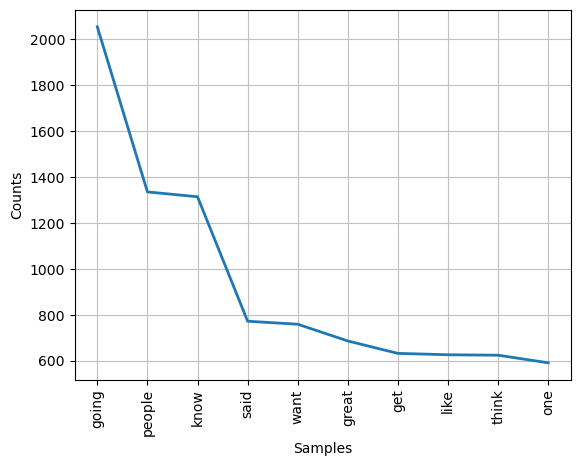

Axes(0.125,0.11;0.775x0.77)


In [40]:
# Read the content of the file "speeches.txt" and store it in the variable speeches_text
file_path = "speeches.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    speeches_text = file.read()

# Tokenize the content of the file into individual words
tokens = word_tokenize(speeches_text)

# Convert all words to lowercase and filter out stopwords
filtered_words = [word.lower() for word in tokens if word.lower() not in custom_stopwords]

# Create a list to store words that follow the word "love" in the speeches
trump_love = []
for i in range(len(filtered_words) - 1):
    if filtered_words[i] == "love":
        trump_love.append(filtered_words[i + 1])

# Calculate the frequency distribution of words in the filtered list
fdis = FreqDist(filtered_words)

# Print the 10 most common words and their frequencies
print(fdis.most_common(10))

# Plot the frequency distribution of the top 10 words
print(fdis.plot(10, cumulative=False))

6. Which are the top 5 countries Trump mentions in his speeches, besides America or the United States of America?

In [41]:
import pycountry
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Creating a list of lowercase country names using the pycountry library
countries = [country.name.lower() for country in pycountry.countries]

# Specifying the file path for the input text file
file_path = "speeches.txt"

# Opening and reading the content of the specified text file
with open(file_path, 'r', encoding='utf-8') as file:
    speeches_text = file.read()

# Tokenizing the text into words
tokens = word_tokenize(speeches_text)

# Filtering out words related to "America", "United", and "States" from the tokenized words
filtered_usa = [word.lower() for word in tokens if word.lower() not in ["america", "united", "states"]]

# Filtering further to retain only words that match with country names
filtered_countries = [word for word in filtered_usa if word in countries]

# Calculating the frequency distribution of the filtered country names
country_frequencies = FreqDist(filtered_countries)

# Extracting the top 5 countries (excluding "America" and "United States") based on frequency
top_countries = country_frequencies.most_common(5)

# Displaying the top 5 countries and their respective mention counts
print("Top 5 countries mentioned (excluding America and the United States):")
for country, count in top_countries:
    print(f"{country}: {count} mentions")


Top 5 countries mentioned (excluding America and the United States):
china: 201 mentions
mexico: 159 mentions
israel: 83 mentions
iraq: 72 mentions
japan: 67 mentions


In class we talked about sentence tokenizers that could be useful in determining when sentences might be repeated. One application we discussed was in political speeches, when certain sentences or phrases are repeated to show a candidates coaching, focus or in marketing terms, "messaging." Here is an analyis from https://www.vox.com/2016/8/18/12423688/donald-trump-speech-style-explained-by-linguists of the "salesman" techniques that Trump uses:
"Trump’s speeches can be appealing because he uses a lot of salesmen’s tricks. Lakoff, for his part, has an explanation for why Trump’s style of speaking is so appealing to many. Many of Trump’s most famous catchphrases are actually versions of time-tested speech mechanisms that salesmen use. They’re powerful because they help shape our unconscious. Take, for example, Trump’s frequent use of "Many people are saying..." or "Believe me" — often right after saying something that is baseless or untrue. This tends to sound more trustworthy to listeners than just outright stating the baseless claim, since Trump implies that he has direct experience with what he’s talking about. At a base level, Lakoff argues, people are more inclined to believe something that seems to have been shared. Or when Trump keeps calling Clinton "crooked," or keeps referring to terrorists as "radical Muslims," he’s strengthening the association through repetition. He also calls his supporters "folks," to show he is one of them (though many politicians employ this trick). Trump doesn’t repeat phrases and adjectives because he is stalling for time, Liberman says; for the most part, he’s providing emphasis and strengthening the association.
These are normal techniques, particularly in conversational speech. "Is he reading cognitive science? No. He has 50 years of experience as a salesman who doesn’t care who he is selling to," Lakoff says. On this account, Trump uses similar methods in his QVC-style pitch of steaks and vodka as when he talks about his plan to stop ISIS."He has been doing this for a very long time as a salesman — that’s what he is best at," Lakoff says."


7. Perform a frequency analysis that provides evidence for the assertion made in the Vox article. 

Consider tokenizing by unigram (one word), bigram(two words), trigram(three words) or more, or whole sentences or multiple approaches that help us understand the most common Trump linguistic characteristcs. Use your evidence and words to describe what you found. This is a fairly open ask. Don't just execute code. Tell me and show me something interesting!


In [48]:
# Fetching the content of a specified URL and extracting text from paragraphs
url = "https://www.vox.com/2016/8/18/12423688/donald-trump-speech-style-explained-by-linguists"
response = requests.get(url)

# Check if the HTTP request was successful (status code 200).
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup.
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract all paragraphs from the HTML content.
    paragraphs = soup.find_all("p")
    
    # Join the text of paragraphs into a single string, separated by two newlines.
    statement_text = '\n\n'.join([paragraph.text for paragraph in paragraphs])
else:
    # Print an error message if the HTTP request fails.
    print("Failed to retrieve!")

# Tokenize the text into sentences.
sentences = sent_tokenize(statement_text)

# Tokenize the text into words.
tokens = word_tokenize(statement_text)

# Filter out custom_stopwords (common words that do not carry much meaning).
filtered_words = [word.lower() for word in tokens if word.lower() not in custom_stopwords]

# Create token lists for unigrams, bigrams, trigrams, and fourgrams.
tokens_list = list(tokens)
bigram_tokens = [(str(bigram[0]), str(bigram[1])) for bigram in list(bigrams(tokens_list))]
trigram_tokens = [(str(trigram[0]), str(trigram[1]), str(trigram[2])) for trigram in list(trigrams(tokens_list))]
fourgram_tokens = [' '.join(tokens_list[i:i + 4]) for i in range(len(tokens_list) - 3)]

# Calculate frequency distributions for sentences, filtered words, bigrams, trigrams, and fourgrams.
fdis = FreqDist(sentences)
fdis1 = FreqDist(filtered_words)
fdis2 = FreqDist(bigram_tokens)
fdis3 = FreqDist(trigram_tokens)
fdis4 = FreqDist(fourgram_tokens)

# Print the 10 most common elements for each frequency distribution.
print(fdis.most_common(10))
print(fdis1.most_common(10))
print(fdis2.most_common(10))
print(fdis3.most_common(10))
print(fdis4.most_common(10))


[('Check your inbox for a welcome email.', 2), ('Oops.', 2), ('Something went wrong.', 2), ('Please enter a valid email and try again.', 2), ('Filed under:\n\nIs Donald Trump a throwback to ancient oratory — or an undisciplined rambler?', 1), ('When Donald Trump goes off script, transcribing him can be a challenge.', 1), ('As someone covering him during this campaign, I can attest to this.', 1), ('When he’s speaking off the cuff, his rambling remarks can be full of digressions and hard-to-follow tangents.', 1), ('He often jumps to an entirely new thought before finishing his previous one.', 1), ('Consider this Trump comment on the Iran nuclear deal during a campaign rally in South Carolina on July 21, 2015.', 1)]
[('trump', 36), ('people', 11), ('many', 11), ('says', 11), ('style', 10), ('speaking', 8), ('power', 7), ('would', 6), ('sentences', 6), ('lakoff', 6)]
[(('’', 's'), 36), (('Trump', '’'), 13), ((',', "''"), 12), ((',', 'and'), 11), (('.', '``'), 11), (('says', '.'), 9), (('.'

8.Sentiment Analysis
Sentiment analysis, also known as opinion mining or emotion AI, is a field of natural language processing (NLP) that focuses on identifying and categorizing opinions or sentiments expressed within text data. The primary goal is to determine the writer's or speaker's attitude towards a particular topic, product, service, or overall context. This attitude can range from positive, negative, to neutral, and may also encompass more nuanced emotions like happiness, anger, sadness, quantitative or emotional.


The most basic form of sentiment analysis assigns values to words based on a dictionary of words, from neutral to slightly positive or negative, moderately positive or negative, and extremely positive or negative. Vader is a popular package that analyzes sentiment.

In [11]:
#run this
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


This will compute a compound score by summing the valence scores of each word int he lexicon and then bnormalized between -1 (most negative) and +1 most positive. This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a "normalize, weighted composite score" is accurate.

let's test opur first sentiment using VADER. VADER is great on social media data which can be messy and contain emojis.
We will use the polarity_scores( ) method to obtain the polarity indices.

In [12]:
sentence = "I love that movie!"
score = analyzer.polarity_scores(sentence)
print(score)

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.6696}


In [13]:
sentence2 = "OMG, this job totally SUX!!"
score = analyzer.polarity_scores(sentence2)
print(score)

{'neg': 0.507, 'neu': 0.493, 'pos': 0.0, 'compound': -0.6261}


In [14]:
sentence3 = '😀' #command+control+space brings up emoji'
score = analyzer.polarity_scores(sentence3)
print(score)

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}


In [15]:
sentence4 = '😀 😀 😀 😀 😀' #command+control+space brings up emoji'
score = analyzer.polarity_scores(sentence4)
print(score)

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.8885}


The global financial crisis (GFC) refers to the period of extreme stress in global financial markets and banking systems between mid 2007 and early 2009. During the GFC, a downturn in the US housing market was a catalyst for a financial crisis that spread from the United States to the rest of the world through linkages in the global financial system. Many banks around the world incurred large losses and relied on government support to avoid bankruptcy. Millions of people lost their jobs as the major advanced economies experienced their deepest recessions since the Great Depression in the 1930s.

The Federal Reserve conference calls are a good way to track the sentiment that the Fed had toward the crisis. Did they know how bad it was? Did they think they could fix it? Starting in January of 2008, ending in October of 2008 map the sentiment of the Fed reserve calls.

Here are your documents:

Jan 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf

Mar 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf

July 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf

Sept 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf

Oct 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf


You will need to convert these pdf into text to process. 
1. Perform a word frequency analysis of each of the calls. Don't forget to remove stopwords.
2. Find and present any evidence that the Fed understands that what the US and world is going through is unlike anything that has ever before been experienced. What are the key phrases that convey this idea? How do you find them? Can you use a vector based approach or would you use a custom dictionary?
3. Extract any evidence that they thought that the situation could be quickly remedied and would not get as bad as it ended up gettting.
4. Parse the key participants and plot their sentiment over time. Who is the most positive? Who is the most negative? Who changes the most?
5. Add key makers to your visualization that bring in the key events of 2008.


In [49]:
# Define URLs for different Federal Reserve documents related to specific meetings in 2008
url1 = "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf"
file1 = "Jan 2008"

url2 = "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf"
file2 = "Mar 2008"

url3 = "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf"
file3 = "July 2008"

url4 = "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf"
file4 = "Sept 2008"

url5 = "https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf"
file5 = "Oct 2008"

# Define a custom dictionary containing words related to unprecedented and negative situations
custom_dictionary = ["unprecedented", "unlike anything before", "never experienced", "unique situation", 
                     "novel circumstances", "crisis", "disaster", "catastrophe", "calamity", "meltdown",
                     "collapse", "chaos", "turmoil", "downturn", "devastation", "ruin", "failure", 
                     "bankruptcy", "ruination", "fallout", "tragedy", "debacle", "dismay", "upheaval", 
                     "desolation"]

# Define a list of words related to the financial crisis of 2008
financial_crisis_words =["financial crisis", "economic downturn", "market collapse", "bankruptcy", 
                         "subprime mortgage", "credit crunch", "housing bubble", "stock market crash",
                         "liquidity crisis", "global recession", "systemic risk", "credit default swaps", 
                         "too big", "bailout", "economic turmoil","financial instability"]

# Define a list of words related to potential solutions or responses to a crisis
solutions = ["stimulus", "intervention", "monetary policy", "interest rates", "liquidity", "bailout", "rescue",
             "support", "injection", "easing", "recovery", "stabilization", "credit facilities", 
             "easing", "measures", "response", "aid", "assistance"]

# Define key events in 2008 with associated dates and brief descriptions
key_events = {
    "2008-03-10": "Collapse of Bear Stearns",
    "2008-07-24": "Fannie Mae and Freddie Mac intervention",
    "2008-09-29": "Lehman Brothers Bankruptcy",
    "2008-10-07": "Emergency Economic Stabilization Act",
}

In [58]:
def sentiment_2008(file, url):
    """
    Downloads a PDF document from the given URL, analyzes its sentiment, and provides relevant information.

    Parameters:
    - file (str): The name of the PDF document without extension.
    - url (str): The URL of the PDF document to be downloaded.

    Returns:
    None

    Prints:
    - Top 20 sentences by frequency in the document.
    - Sentences related to unprecedented events.
    - Sentences containing solution phrases.
    - Final compound sentiment score for the document.
    - Sentiment scores for participants mentioned in the document.
    - Most positive, most negative, and participant with the most significant change in sentiment.
    - Plot of sentiment scores of participants over time with key events highlighted.

    Note: I had to use ChatGPT for plotting as I'm facing issues with matplotlib. 
          So, I am not sure about the accuracy of it.
    """
    response = requests.get(url)
    if response.status_code == 200:
        with open(f"{file}.pdf", "wb") as pdf_file:
            pdf_file.write(response.content)
        with pdfplumber.open(f"{file}.pdf") as pdf:
            statement_text = ""
            for page_num in range(len(pdf.pages)):
                page = pdf.pages[page_num]
                statement_text += page.extract_text()
        import os
        os.remove(f"{file}.pdf")
        
        custom_stopwords_1 = set(custom_stopwords)

        tokens = word_tokenize(statement_text)
        filtered_words = [word.lower() for word in tokens if word.lower() not in custom_stopwords_1]
        fdis = FreqDist(filtered_words)
        print(f"\nTop 20 Sentences by Frequency in {file}:")
        print(fdis.most_common(20))
        
        
        key_phrases = [sentence for sentence in sentences if any(phrase in sentence.lower() for phrase in custom_dictionary)]
        key_phrases += [sentence for sentence in sentences if any(phrase in sentence.lower() for phrase in financial_crisis_words)]
        if key_phrases:
            print(f"\n Sentences related to Unprecedented Events in {file}:")
            for phrase in key_phrases:
                print(f"- {phrase}")
        else:
            print(f"\n No key phrases related to unprecedented events found in {file}.")
        
        
        sol_sentences = [sentence for sentence in sentences if any(phrase in sentence.lower() for phrase in solutions)]
        if sol_sentences:
            print(f"\nSentences Containing Solution Phrases in {file}:")
            for sentence in sol_sentences:
                print(f"- {sentence}")
        else:
            print(f"\nNo sentences containing solution phrases found in {file}.")
        
        
        analyzer = SentimentIntensityAnalyzer()
        document_score = analyzer.polarity_scores(statement_text)
        print(f"\nFinal Compound Sentiment Score for {file}: {document_score['compound']}")        
        
        
        participant_sentences = [sentence for sentence in sent_tokenize(statement_text)
                                 if sentence.lower().startswith(('mr.', 'ms.', 'mrs.', 'chairman', 'vice chairman',))]
        participant_names = []
        for participant_sentence in participant_sentences:
            name = participant_sentence.split(',')[0].replace(':', '').strip()
            participant_names.append(name)
        analyzer = SentimentIntensityAnalyzer()
        participant_scores = []
        for participant_sentence in participant_sentences:
            scores = analyzer.polarity_scores(participant_sentence)
            participant_scores.append(scores['compound'])
        print(f"\nSentiment Scores for {file} Participants:")
        for i, (name, scores) in enumerate(zip(participant_names, participant_scores)):
            print(f"{name}: {scores}")
        most_positive_index = max(range(len(participant_scores)), key=lambda i: participant_scores[i])
        most_negative_index = min(range(len(participant_scores)), key=lambda i: participant_scores[i])
        participant_change_index = max(range(1, len(participant_scores)), key=lambda i: participant_scores[i] - participant_scores[i - 1])
        print(f"\nMost Positive Participant in {file}:")
        print(participant_names[most_positive_index])
        print(f"\nMost Negative Participant in {file}:")
        print(participant_names[most_negative_index])
        print(f"\nParticipant with the Most Significant Change in Sentiment in {file}:")
        print(participant_names[participant_change_index])
        
        
        key_event_indices = [participant_names.index(date) for date in key_events.keys()]
        plt.figure(figsize=(10, 6))
        plt.plot(participant_names, participant_scores, marker='o', linestyle='-', color='b', label='Sentiment Scores')
        plt.title(f"Sentiment Scores of Participants over Time ({file})")
        plt.xlabel("Participant Names")
        plt.ylabel("Compound Sentiment Score")
        plt.xticks(rotation=45, ha='right')
        for index in key_event_indices:
            plt.axvline(x=index, color='r', linestyle='--', label='Key Events')
        plt.legend()
        plt.tight_layout()
        plt.show()        

        
    else:
        print("Failed to retrieve!")

In [59]:
# Calling the sentiment_2008 function
sentiment_2008(file1, url1)
sentiment_2008(file2, url2)
sentiment_2008(file3, url3)
sentiment_2008(file4, url4)
sentiment_2008(file5, url5)


Top 20 Sentences by Frequency in Jan 2008:
[('think', 90), ('mr.', 76), ('markets', 71), ('market', 64), ('chairman', 61), ('would', 56), ('financial', 49), ('going', 43), ('thank', 42), ('inflation', 42), ('today', 38), ('president', 38), ('21', 36), ('rate', 36), ('2008', 35), ('meeting', 34), ('32', 33), ('basis', 32), ('move', 32), ('much', 31)]

 No key phrases related to unprecedented events found in Jan 2008.

Sentences Containing Solution Phrases in Jan 2008:
- ), but when you look at what's going on with the four prisoners — now it used to be three, now it’s four — but when it was three and even now, I would have said it's all in the messenger; fellas, and it is fellas because, you know, they don't, they haven’t figured that the women are smarter right now than the men, so, you know, it’s gonna take them about another 150 years — but the Persians are great negotiators, the Iranians are great negotiators, so, and they, they just killed, they just killed us.
- Many people clear

ValueError: '2008-03-10' is not in list

9. Sentiment analysis is not a perfect science, especially when you are using off-the-shelf packages like VADER. Given what you know about the crisis, do you trust Vader's sentiment analysis? Why or why not?


While VADER serves as a useful tool for approximating the sentiments, it might not be the best tool to understand the true sentiments of individuals tasked with managing the crisis. For instance, the sentence "A newish wrinkle here in terms of bank markdowns reflects the deterioration of some of the monoline guarantors," which received a neutral score from VADER. In reality, when one reads this sentence, there is a discernible negative undertone, which is not at all captured by VADER. This highlights the inherent challenge in relying solely on sentiment analysis tools, as nuances in language and context may lead to misinterpretations. This showcases the importance of human judgment in comprehending sentiment.


10. Can you reasonably determine whether a low or negative compound score indicates a negative sentiment from the Fed in 2008? Can you do so with data only from 2008?

Provide a reasonable comparison from 2008 values by comparing it to some other timeframe from the FED confernce call historic database. https://www.federalreserve.gov/monetarypolicy/fomc_historical_year.htm

In [ ]:
# Define URLs for different Federal Reserve documents related to specific meetings in 2013
url6 = "https://www.federalreserve.gov/monetarypolicy/files/FOMC20130130meeting.pdf"
file6 = "Jan 2013"

url7 = "https://www.federalreserve.gov/monetarypolicy/files/FOMC20130320meeting.pdf"
file7 = "Mar 2013"

url8 = "https://www.federalreserve.gov/monetarypolicy/files/FOMC20130731meeting.pdf"
file8 = "July 2013"

url9 = "https://www.federalreserve.gov/monetarypolicy/files/FOMC20130918meeting.pdf"
file9 = "Sept 2013"

url10 = "https://www.federalreserve.gov/monetarypolicy/files/FOMC20131030meeting.pdf"
file10 = "Oct 2013"

In [ ]:
def sentiment_2013(file, url):
    """
    Downloads a PDF file from the given URL, analyzes its sentiment,
    and provides sentiment scores for overall document and participants.

    Parameters:
    - file (str): The base name for the PDF file to be saved and analyzed.
    - url (str): The URL from which the PDF file will be retrieved.

    Prints:
    - Final Compound Sentiment Score for the document.
    - Sentiment Scores for participants.
    - Most Positive, Most Negative, and Participant with the Most Significant Change in Sentiment.
    """
    response = requests.get(url)
    if response.status_code == 200:
        with open(f"{file}.pdf", "wb") as pdf_file:
            pdf_file.write(response.content)
        with pdfplumber.open(f"{file}.pdf") as pdf:
            statement_text = ""
            for page_num in range(len(pdf.pages)):
                page = pdf.pages[page_num]
                statement_text += page.extract_text()
        import os
        os.remove(f"{file}.pdf")

        analyzer = SentimentIntensityAnalyzer()
        document_score = analyzer.polarity_scores(statement_text)
        print(f"\nFinal Compound Sentiment Score for {file}: {document_score['compound']}")

        participant_sentences = [sentence for sentence in sent_tokenize(statement_text)
                                 if sentence.lower().startswith(('mr.', 'ms.', 'mrs.', 'chairman', 'vice chairman',))]
        participant_names = []
        for participant_sentence in participant_sentences:
            name = participant_sentence.split(',')[0].replace(':', '').strip()
            participant_names.append(name)
        analyzer = SentimentIntensityAnalyzer()
        participant_scores = []
        for participant_sentence in participant_sentences:
            scores = analyzer.polarity_scores(participant_sentence)
            participant_scores.append(scores['compound'])
        print(f"\nSentiment Scores for {file} Participants:")
        for i, (name, scores) in enumerate(zip(participant_names, participant_scores)):
            print(f"{name}: {scores}")
        most_positive_index = max(range(len(participant_scores)), key=lambda i: participant_scores[i])
        most_negative_index = min(range(len(participant_scores)), key=lambda i: participant_scores[i])
        participant_change_index = max(range(1, len(participant_scores)), key=lambda i: participant_scores[i] - participant_scores[i - 1])
        print(f"\nMost Positive Participant in {file}:")
        print(participant_names[most_positive_index])
        print(f"\nMost Negative Participant in {file}:")
        print(participant_names[most_negative_index])
        print(f"\nParticipant with the Most Significant Change in Sentiment in {file}:")
        print(participant_names[participant_change_index])
    
        
    else:
        print("Failed to retrieve!")

In [ ]:
# Calling the sentiment_2013 function
sentiment_2013(file6, url6)
sentiment_2013(file7, url7)
sentiment_2013(file8, url8)
sentiment_2013(file9, url9)
sentiment_2013(file10, url10)

By comparing sentiment from 2013 and 2008, it becomes apparent that the compound scores in 2013 exhibit a substantial increase. 